# **Covid Prediction** **Model** 

Importing libraries

In [107]:
#import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import pickle

import plotly
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot


pyo.init_notebook_mode(connected=True)
cf.go_offline()
from plotly.offline import init_notebook_mode,plot,iplot
plotly.io.renderers.default = 'colab'

loading dataset

In [108]:
#reading the dataset using pandas library
df = pd.read_csv('/content/state_wise_daily.csv',parse_dates=['Date','Date_YMD'])

In [109]:
#This head method prints the first 10 data rows from the dataset 
df.head(10)

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,CT,DN,DD,DL,GA,GJ,HR,HP,JK,JH,KA,KL,LA,LD,MP,MH,MN,ML,MZ,NL,OR,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,2020-03-14,2020-03-14,Confirmed,81,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,14.0,0.0,2.0,0.0,6.0,19.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,1.0,1.0,0.0,12.0,0.0,0,0.0
1,2020-03-14,2020-03-14,Recovered,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0
2,2020-03-14,2020-03-14,Deceased,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
3,2020-03-15,2020-03-15,Confirmed,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0,0.0
4,2020-03-15,2020-03-15,Recovered,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0
5,2020-03-15,2020-03-15,Deceased,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
6,2020-03-16,2020-03-16,Confirmed,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0.0
7,2020-03-16,2020-03-16,Recovered,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0
8,2020-03-16,2020-03-16,Deceased,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
9,2020-03-17,2020-03-17,Confirmed,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1,0.0


In [110]:
#this will provide the matrix (mxn) of the dataset like : number of rows x number of columns
df.shape

(1635, 42)

Data cleaning and preprocessing

In [111]:
# below we are extracting the data only which is required 
# using pandas library we are taking west bengal state
# we are taking date and status columns of west bengal from the dataset
pivot = pd.pivot_table(df,values='TT',index='Date_YMD',columns='Status').sort_values(by='Date_YMD') #seperating of relevant features

converting into dataframe

In [112]:
#we are converting the data into a dataframe 
#using pandas library
finalData = pd.DataFrame(pivot)

Resetting index according to the new data

In [113]:
#Resetting the indexes of the data which is extracted 
finalData.reset_index(inplace=True)

In [114]:
#This will print the first five data rows of the dataframe which we are going to use
#for our predictions.
finalData.head()

Status,Date_YMD,Confirmed,Deceased,Recovered
0,2020-01-04,424.0,9.0,16.0
1,2020-01-05,2396.0,77.0,962.0
2,2020-01-06,7723.0,201.0,3882.0
3,2020-01-07,19429.0,438.0,12064.0
4,2020-01-08,55117.0,854.0,51368.0


In [115]:
#This will print the datatypes of the dataframe.
finalData.dtypes

Status
Date_YMD     datetime64[ns]
Confirmed           float64
Deceased            float64
Recovered           float64
dtype: object

# **Future Prediction of Confirmed Cases on** **finalData** ****

**Visualization of the data we make predictions**

In [116]:
#Plotting the graph of the confirmed cases of west bengal state from the dataset
#With respect to the date 
finalData.iplot(kind='scatter',x='Date_YMD',y='Confirmed',xTitle='Months',yTitle='Count of Cases',title='CONFIRMED') #Confirmed cases visualization

**Seperating different categories**

In [117]:
#we are seperating the data with respect to their status.
Confirmed = finalData[['Date_YMD','Confirmed']]
Recovered = finalData[['Date_YMD','Recovered']]
Deceased = finalData[['Date_YMD','Deceased']]

In [118]:
#Confirmed cases data
Confirmed.head()

Status,Date_YMD,Confirmed
0,2020-01-04,424.0
1,2020-01-05,2396.0
2,2020-01-06,7723.0
3,2020-01-07,19429.0
4,2020-01-08,55117.0


In [119]:
#Confirmed cases data types
Confirmed.dtypes

Status
Date_YMD     datetime64[ns]
Confirmed           float64
dtype: object

**Renaming the columns**

In [120]:
#AS the fbprophet model takes inuput columns of date as ds and confirmed or recovered or deceased cases ad y
Confirmed.columns = ['ds','y']
Recovered.columns = ['ds','y']
Deceased.columns = ['ds','y']

# **Model Initialization and Evaluation**

***We are using fbprophet model for predicting future cases***

In [121]:
#Initializing the model
#fbprophet model is the time series forecasting model which helps us to make predictions 
#based on the previous data
# This model also provides us the weakly, yearly, monthly trends also
from fbprophet import Prophet
m = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True,weekly_seasonality=True)

In [122]:
#Fitting the model with data
m.fit(Confirmed)

**Creating the future dataset for future predictions**

In [123]:
# We are making the future dates for predictions
#Here we are predicting for 10 days 
#from 18th june 2021 to 27th june 2021
future = m.make_future_dataframe(periods=10)
future.tail(10)
dtts = future.tail(10)
dtts.to_csv('input.csv')

In [124]:
#forecasting with model
#predicting the cases for the future 10 days 
# ds = dates
#yhat = predicted outputs
# yhat_upper = upper limit the prediction values
#yhat_lower = lower limit of the prediction values
forecast = m.predict(future)
forecast[['ds','yhat','yhat_upper','yhat_lower']].tail(7)

,ds,yhat,yhat_upper,yhat_lower
716,2022-12-06,94717.066380,231633.584990,-44709.641574
717,2022-12-07,95176.767028,241551.679837,-41829.976413
718,2022-12-08,98256.175102,241093.271829,-41007.868012
719,2022-12-09,99439.187882,237827.902043,-45241.565161
720,2022-12-10,92039.440370,220948.148381,-46951.253285
721,2022-12-11,88827.657784,237546.003300,-63417.911816
722,2022-12-12,84496.018561,222644.408930,-52694.321759


In [125]:
#This is the first 10 rows of the we are predicted
# it shows weakly trends , monthly, yearly trends.
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-04,1636.571788,-148807.916428,127107.965797,1636.571788,1636.571788,-5793.129654,-5793.129654,-5793.129654,4856.487937,4856.487937,4856.487937,88.790212,88.790212,88.790212,-10738.407804,-10738.407804,-10738.407804,0.0,0.0,0.0,-4156.557866
1,2020-01-05,1769.569663,-144663.582765,142844.440054,1769.569663,1769.569663,-1382.710816,-1382.710816,-1382.710816,4856.487937,4856.487937,4856.487937,-1613.519754,-1613.519754,-1613.519754,-4625.679000,-4625.679000,-4625.679000,0.0,0.0,0.0,386.858846
2,2020-01-06,1902.567537,-132533.715487,144256.809037,1902.567537,1902.567537,2167.684882,2167.684882,2167.684882,4856.487937,4856.487937,4856.487937,-4424.251283,-4424.251283,-4424.251283,1735.448228,1735.448228,1735.448228,0.0,0.0,0.0,4070.252420
3,2020-01-07,2035.565412,-124167.832671,150492.335018,2035.565412,2035.565412,10563.996280,10563.996280,10563.996280,4856.487937,4856.487937,4856.487937,-2578.862156,-2578.862156,-2578.862156,8286.370499,8286.370499,8286.370499,0.0,0.0,0.0,12599.561692
4,2020-01-08,2168.563287,-111395.003069,163626.746632,2168.563287,2168.563287,18882.767885,18882.767885,18882.767885,4856.487937,4856.487937,4856.487937,-936.623443,-936.623443,-936.623443,14962.903391,14962.903391,14962.903391,0.0,0.0,0.0,21051.331172


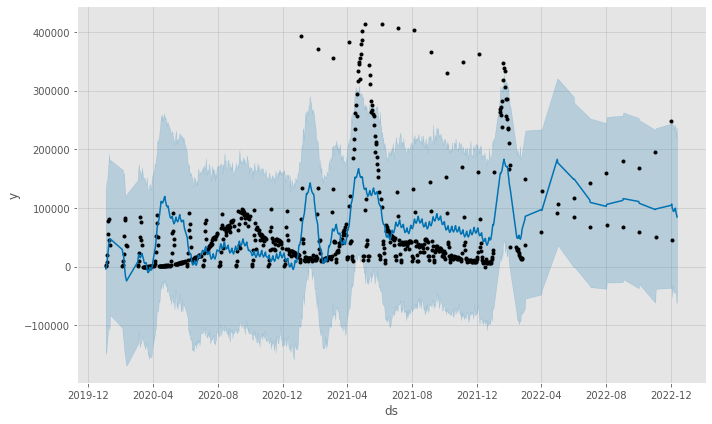

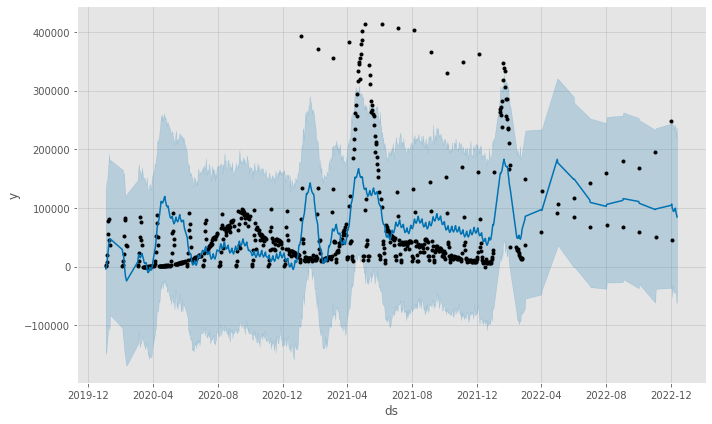

In [126]:
#forecast plot 
#below we are ploting the predicted values vs the trained data
# blue color line is the hypothesis line created by the model
# Black color line is the data from the dataset we used 
confirmed_forecast_plot = m.plot(forecast)
confirmed_forecast_plot

In [127]:
pickle.dump( m, open("india_model","wb"))

Model initilization

In [128]:
#instantiating model
#fbprophet model is the time series forecasting model which helps us to make predictions 
#based on the previous data
# This model also provides us the weakly, yearly, monthly trends also
m1 = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True,weekly_seasonality=True)

**Fitting the model with the recovered cases data**

In [129]:
#fit the model
m1.fit(Recovered)

In [130]:
# We are making the future dates for predictions
#Here we are predicting for 10 days 
#from 18th june 2021 to 27th june 2021
forecast_1 = m1.predict(future) #predictions

In [131]:
#printing the last 10 values of the predicted data.
forecast_1[['ds','yhat','yhat_upper','yhat_lower']].tail(10)

,ds,yhat,yhat_upper,yhat_lower
713,2022-12-03,212922.301408,357473.526637,76714.424899
714,2022-12-04,210800.742449,342548.884037,72175.231170
715,2022-12-05,212434.740984,349585.723207,74508.783874
716,2022-12-06,209342.644973,341286.783345,71216.247826
717,2022-12-07,202111.078247,338402.016879,64299.422460
718,2022-12-08,202367.595392,331735.225394,78271.349680
719,2022-12-09,208971.338775,346825.688478,78326.538509
720,2022-12-10,200655.889753,333882.585238,64603.969020
721,2022-12-11,200699.099446,335088.156843,66255.802187
722,2022-12-12,204885.431318,332683.966461,65060.203742


In [132]:
#ploting the total recovered cases of the west bengal state from the dataset
finalData.iplot(kind='scatter',x='Date_YMD',y='Recovered',xTitle='Months',yTitle='Count of Cases',title='Recovered') #visualizations

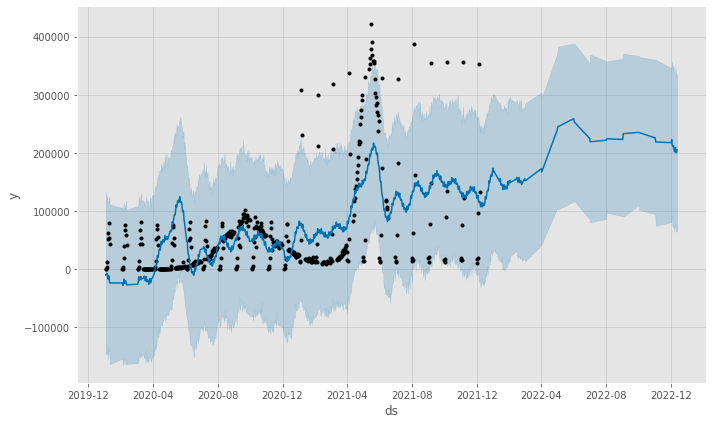

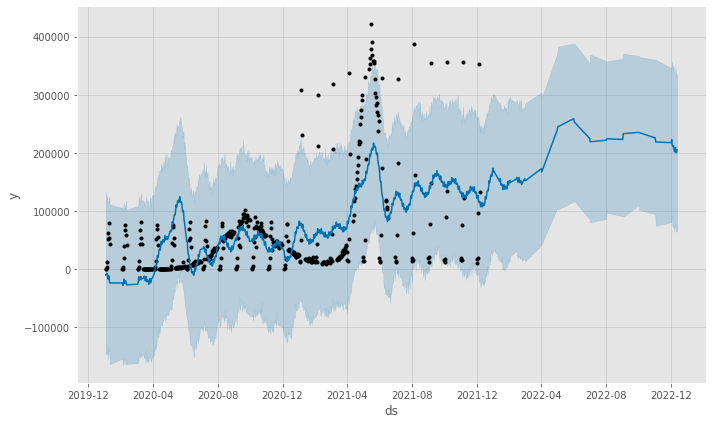

In [133]:
#below we are ploting the predicted values vs the trained data
# blue color line is the hypothesis line created by the model
# Black color line is the data from the dataset we used 
recovered_forecast_plot = m1.plot(forecast_1)
recovered_forecast_plot

In [134]:
#instantiating model
#fbprophet model is the time series forecasting model which helps us to make predictions 
#based on the previous data
# This model also provides us the weakly, yearly, monthly trends also
m2 = Prophet(interval_width=0.9,daily_seasonality=True,weekly_seasonality=True,yearly_seasonality=True) #Instantiating Model

**Fitting the model with Death cases Data**

In [135]:
#fitting the data to the model
m2.fit(Deceased) 

# **Visualization**

In [136]:
#plotting the death cases data from the dataset of west bengal state
finalData.iplot(kind='scatter',x='Date_YMD',y='Deceased',xTitle='Months',yTitle='Count of Cases',title='DECEASED')

In [137]:
# We are making the future dates for predictions
#Here we are predicting for 10 days 
#from 18th june 2021 to 27th june 2021
forecast_2 = m2.predict(future) #predictions

In [138]:
#printing the last 7 rows of the predicted data
forecast_2[['ds','yhat','yhat_upper','yhat_lower']].tail(7)

,ds,yhat,yhat_upper,yhat_lower
716,2022-12-06,2585.293549,4035.636816,1089.959870
717,2022-12-07,2491.644816,3990.211494,1032.566654
718,2022-12-08,2443.325793,3927.912679,942.636372
719,2022-12-09,2503.633847,3864.483820,1040.851902
720,2022-12-10,2452.404283,3887.150611,971.404614
721,2022-12-11,2467.339877,3951.696363,1036.079262
722,2022-12-12,2548.922864,4047.528673,1005.493861


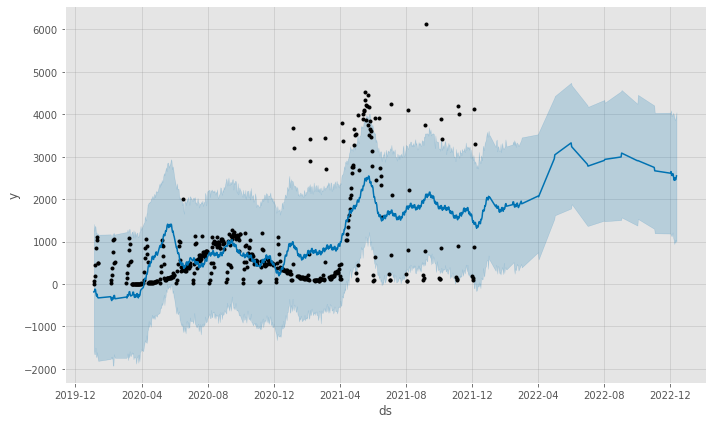

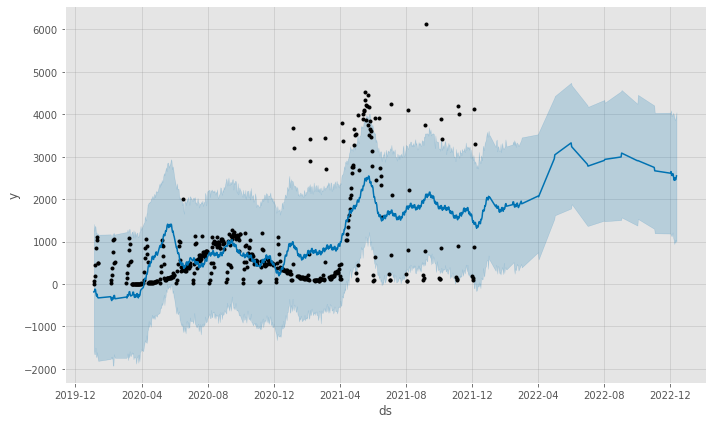

In [139]:
#below we are ploting the predicted values vs the trained data
# blue color line is the hypothesis line created by the model
# Black color line is the data from the dataset we used
deceased_forecast_plot = m2.plot(forecast_2) #forecast plot
deceased_forecast_plot

In [140]:
#pickle.dump( m, open("india_model","wb"))

In [141]:
#################################
#                               #
#  Generating Future dates      #
#                               #
#################################

import pandas as pd

class Dates:

    __existMonths = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
    __existDays = ["31", "28", "31", "30", "31", "30", "31", "31", "30", "31", "30", "31"] 

    def __init__(self, num, startDate) -> None:
        self.num = num
        self.startDate = startDate

    def __dateParser(self):

        startDate = list(self.startDate)
        year = "".join(startDate[:4])
        month = "".join(startDate[5:7])
        day = "".join(startDate[8:10])
        # print(f"{year}-{month}-{day}")

        #temp
        mnth = month
        yea = year 
        dat = day

        
        mm = int(mnth)
        yy = int(yea)
        dd = int(dat)


        resultDates = []


        for i in range(self.num):
            
            if mnth in Dates.__existMonths:
                if dat == Dates.__existDays[mm-1]:
                    newDate = f"{yea}-{mnth}-{dat}"
                   
                    resultDates.append(newDate)

                    if mnth[0]=="0":
                        
                        mm+=1

                        if mm<10:
                            mnth = f"0{mm}"
                            
                        else:
                            mnth = f"{mm}"
                    else:
                        mm+=1
                        if mm>12:
                            mm = 1
                            mnth = f"0{mm}"
                            yy+=1
                            yea = f"{yy}"
                        else:
                            mnth = f"{mm}"              
                    dat = f"0{1}"
                    
                    
                elif dat != Dates.__existDays[mm-1]:
                    newDate = f"{yea}-{mnth}-{dat}"
                   
                    resultDates.append(newDate)
                    if dat[0]=="0":
                        dd = int(dat)
                        dd+=1  
                        if dd<10:
                            dat = f"0{dd}"      
                        else:
                            dat = f"{dd}"        
                    else:
                        dd = int(dat)
                        dd+=1
                        dat = f"{dd}"
                        
        #write_file("output.csv", resultDates)          
              
        return resultDates
        

    def futureDates(self):
        values = self.__dateParser()
        df = pd.DataFrame(values)
        df.columns=['ds']
        return df


Enter the numner of days to predict
30
Enter the Starting date in the given format YYYY-MM-DD
2022-01-01


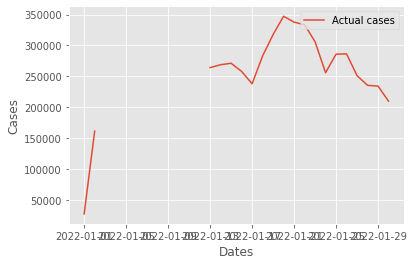

In [142]:
#####################################
#                                   #
#    Prediction Model               #
#                                   # 
#####################################  

from cProfile import label
from cmath import e
import pickle
from tempfile import tempdir
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce


class Model:

    def __init__(self, n, date) -> None:
        self.n = n
        self.date = date


    def predictions(self):
        dates = Dates(self.n, self.date)
        val = dates.futureDates()
        with open('/content/india_model','rb') as f:
            model = pickle.load(f)
        try:
            output = model.predict(val)
        except e:
            print(e)
        return output['yhat']

    def data_extraction(self, df):

        dates = Dates(self.n, self.date)
        val = dates.futureDates()
        val['ds'] = val['ds'].astype('datetime64')
        
        pivot = pd.pivot_table(df,values='TT',index='Date_YMD',columns='Status').sort_values(by='Date_YMD') #seperating of relevant features
        finalData = pd.DataFrame(pivot)
        finalData.reset_index(inplace=True)   

        #val and finalData df1 and df2
        results = pd.merge(val, 
                  finalData[['Date_YMD', 'Confirmed']],
                  left_on='ds',
                  right_on='Date_YMD',
                  how='left')

        return results


    def graph(self, df):


        preds = self.predictions()
        preds = pd.DataFrame(preds)
        
        extracts = self.data_extraction(df)
        
       # plt.plot(extracts['ds'], preds['yhat'], label='predicted cases')
        plt.plot(extracts['ds'], extracts['Confirmed'], label='Actual cases')
        plt.ylabel('Cases')
        plt.xlabel('Dates')
        plt.legend(loc='upper right')
        plt.show()

# below code is for Model Class
n = int(input("Enter the numner of days to predict\n"))
date = input("Enter the Starting date in the given format YYYY-MM-DD\n")
df = pd.read_csv('state_wise_daily.csv',parse_dates=['Date','Date_YMD'])
model = Model(n, date)
model.graph(df)
